### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Uniremos los 4 DataFrame

tienda['Tienda']='Tienda1'
tienda2['Tienda']='Tienda2'
tienda3['Tienda']='Tienda3'
tienda4['Tienda']='Tienda4'

df_total = pd.concat([tienda, tienda2, tienda3, tienda4])

#Exploramos el DF final y revisamos si hay nullos
df_total.info()
df_total.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.0+ MB


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda1


#1. Análisis de facturación



Los ingreso de la tienda 1 es: 1150880400.0
Los ingreso de la tienda 2 es: 1116343500.0
Los ingreso de la tienda 3 es: 1098019600.0
Los ingreso de la tienda 4 es: 1038375700.0


<Axes: xlabel='Tienda'>

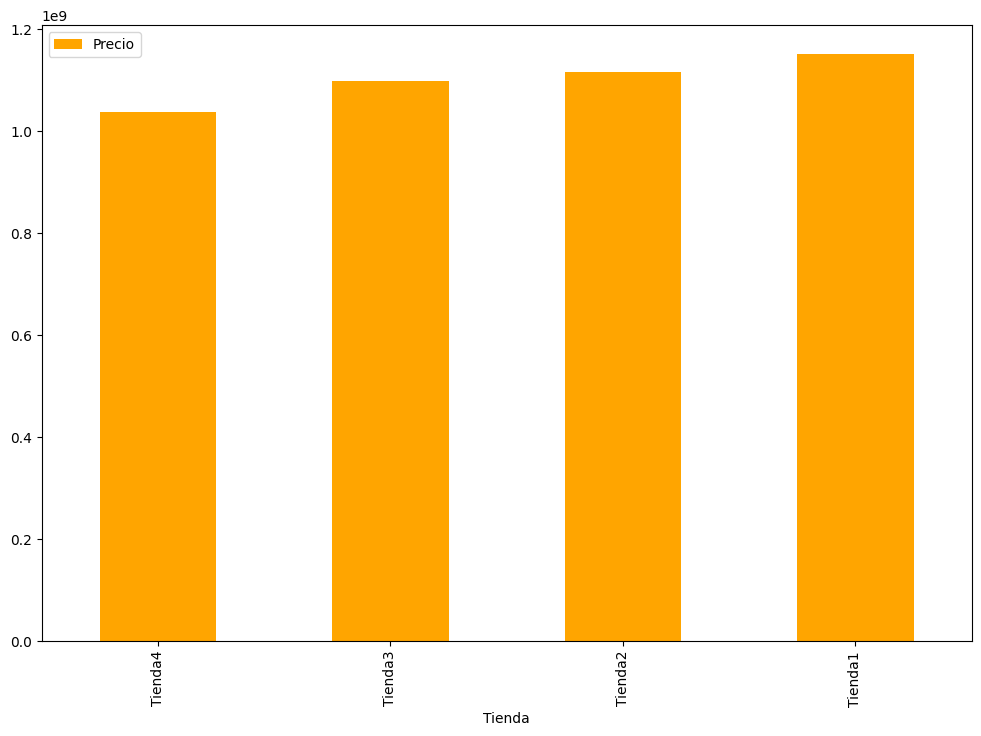

In [ ]:
#Calculamos los ingresos totales x tienda
a=tienda['Precio'].sum()
b=tienda2['Precio'].sum()
c=tienda3['Precio'].sum()
d=tienda4['Precio'].sum()
print(f"Los ingreso de la tienda 1 es: {a}")
print(f"Los ingreso de la tienda 2 es: {b}")
print(f"Los ingreso de la tienda 3 es: {c}")
print(f"Los ingreso de la tienda 4 es: {d}")

#Ahora realizamos un gráfico
df_total.groupby('Tienda')[['Precio']].sum().sort_values('Precio').plot(kind='bar',figsize=(12,8),color='orange')


# 2. Ventas por categoría

                         Tienda1  Tienda2  Tienda3  Tienda4
Categoría del Producto                                     
Muebles                      465      442      499      480
Electrónicos                 448      422      451      451
Juguetes                     324      313      315      338
Electrodomésticos            312      305      278      254
Deportes y diversión         284      275      277      277
Instrumentos musicales       182      224      177      170
Libros                       173      197      185      187
Artículos para el hogar      171      181      177      201


<Axes: ylabel='Categoría del Producto'>

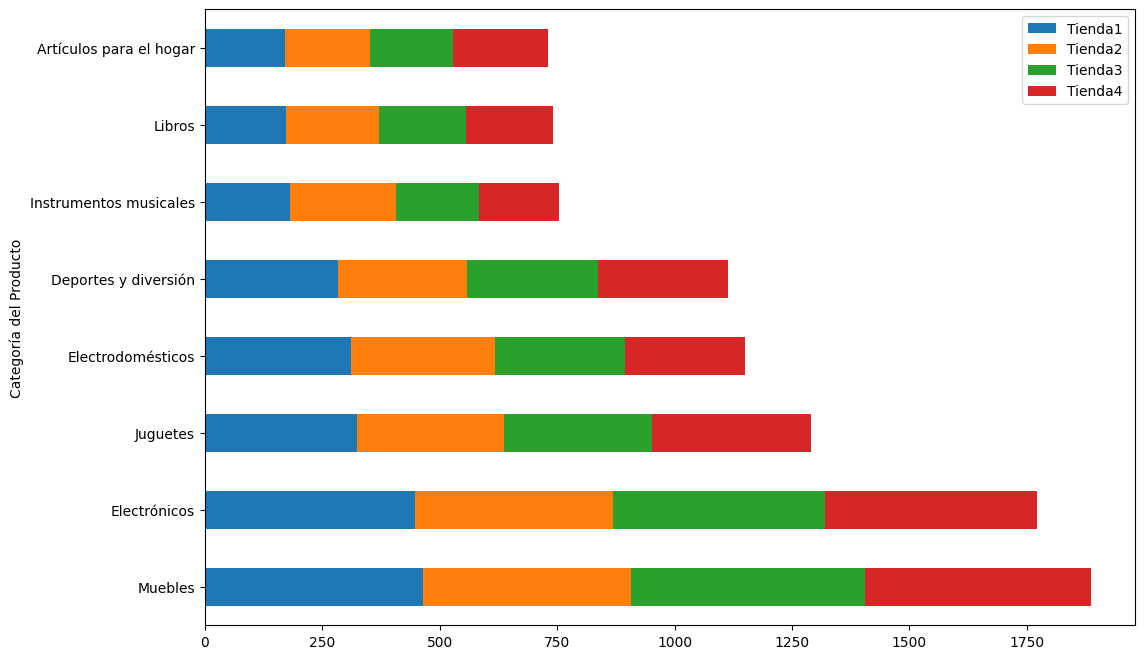

In [ ]:
a=df_total.groupby(['Categoría del Producto','Tienda'])[['Producto']].count().unstack()
a.columns=['Tienda1','Tienda2','Tienda3','Tienda4']
a['Total']=a.sum(axis=1)
a=a.sort_values('Total',ascending=False)
a.drop('Total',axis=1,inplace=True)
print(a)
a.plot(kind='barh',figsize=(12,8),stacked=True)

# 3. Calificación promedio de la tienda


         Calificación
Tienda               
Tienda3      4.048326
Tienda2      4.037304
Tienda4      3.995759
Tienda1      3.976685


<Axes: xlabel='Tienda'>

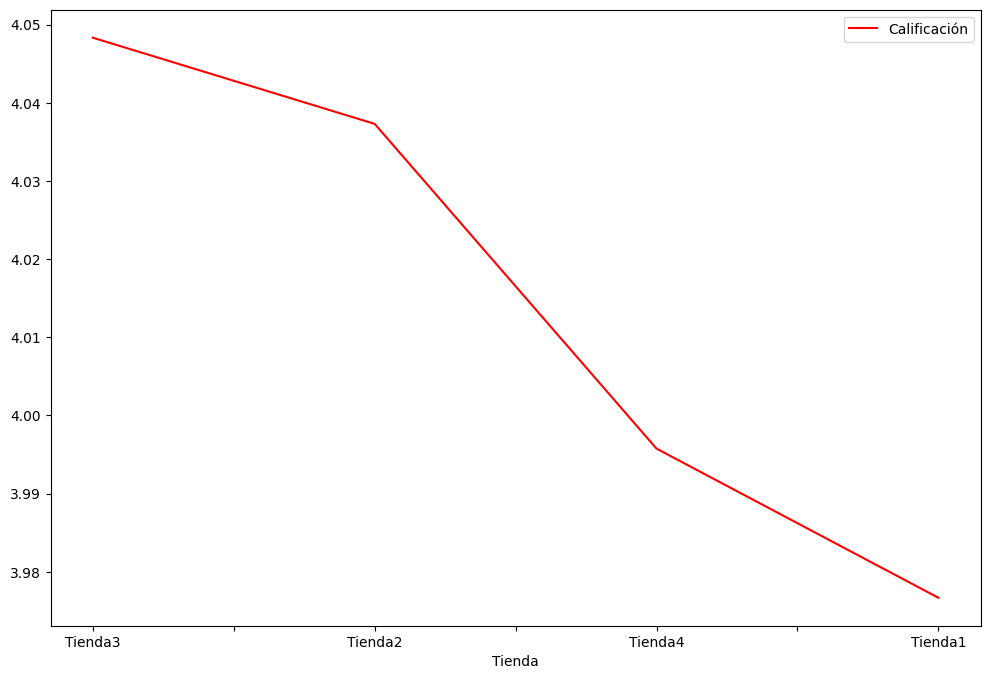

In [ ]:
a=df_total.groupby('Tienda')[['Calificación']].mean().sort_values('Calificación',ascending=False)
print(a)
a.plot(kind='line',figsize=(12,8),color='red')


# 4. Productos más y menos vendidos

In [ ]:
a=df_total.groupby(['Tienda','Producto','Categoría del Producto'])['Producto'].count().reset_index(name='Ventas').sort_values(['Tienda','Ventas'],ascending=[True,False]).groupby('Tienda').head(5).sort_values('Ventas',ascending=False)
print('TOP 5 productos más vendidos x Tienda')
print(a)
print('-----------------------------------------------')
print('TOP 5 productos menos vendidos x Tienda')
b=df_total.groupby(['Tienda','Producto','Categoría del Producto'])['Producto'].count().reset_index(name='Ventas').sort_values(['Tienda','Ventas'],ascending=[True,True]).groupby('Tienda').head(5).sort_values('Ventas',ascending=False)
print(b)

TOP 5 productos más vendidos x Tienda
      Tienda                   Producto   Categoría del Producto  Ventas
75   Tienda2  Iniciando en programación                   Libros      65
84   Tienda2                 Microondas        Electrodomésticos      62
163  Tienda4                   Cama box                  Muebles      62
58   Tienda2                    Batería   Instrumentos musicales      61
33   Tienda1                 Microondas        Electrodomésticos      60
48   Tienda1              TV LED UHD 4K             Electrónicos      60
1    Tienda1                    Armario                  Muebles      60
168  Tienda4                 Cubertería  Artículos para el hogar      59
40   Tienda1           Secadora de ropa        Electrodomésticos      58
72   Tienda2          Guitarra acústica   Instrumentos musicales      58
89   Tienda2                  Pandereta   Instrumentos musicales      58
129  Tienda3              Kit de bancas                  Muebles      57
113  Tienda3 

# 5. Envío promedio por tienda

In [ ]:
df_total.groupby('Tienda')[['Costo de envío']].mean().round(2).sort_values('Costo de envío',ascending=False)


,Costo de envío
Tienda,
Tienda1,26018.61
Tienda2,25216.24
Tienda3,24805.68
Tienda4,23459.46


# **Conclusiones**


* La tienda 4 es la que presenta el menor ingreso comparada con las demás presentando una diferencia de en promedio $60 millones
* Las unidades por Categoría del Producto no muestran grandes diferencias entre las tiendas o que alguna tienda resalte en categorías específicas
* La calificación de los clientes ponen a las tiendas 4 y 1 como las de calificación más baja,no pasando los 4 puntos de media.
* El top 5 de productos más vendidos y menos vendidos,se ve que 3 de los 5 productos de mayores venta de la tienda 4 estan en la cola de lista
* El costo de envío más barato lo tiene la tienda 4 y el más caro la tienda 1.


#**Recomendacion:**

Vender la tienda 4 ya que no resalta en ninguna categoría en específica,además de que es la que tiene menores ventas y se encuentra en 3er lugar;aunque tenga el menor costo promedio de envío por tienda,esto no se ve reflejado en ventas grandes ya que de su top 5 de productos vendidos ,queda su gran mayoria relegados comparados con el Top 5 de las otras tiendas